In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch

In [2]:
housevalue = fch()

In [3]:
X = pd.DataFrame(housevalue.data)
X.head()
# 量纲不统一

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y = housevalue.target
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [5]:
X.shape

(20640, 8)

In [6]:
y.shape

(20640,)

In [8]:
y.max()

5.00001

In [9]:
y.min()

0.14999

In [10]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
X.columns = housevalue.feature_names

In [6]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

# 恢复索引
for i in [X_train, X_test]:
    i.index = range(i.shape[0])
X_train.head()

In [16]:
X_train.shape

(14448, 8)

In [ ]:
# Nomalization
from sklean.preprocessing import StandardScaler


In [17]:
reg = LR().fit(X_train, y_train)
yhat = reg.predict(X_test)

In [18]:
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

In [19]:
yhat.min()

-0.6528439725035895

In [20]:
yhat.max() #yhat的值在y真实值范围外

7.146198214270882

In [21]:
# 查看系数
reg.coef_

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [22]:
[*zip(X_train.columns, reg.coef_)]

[('MedInc', 0.43735893059684033),
 ('HouseAge', 0.010211268294494024),
 ('AveRooms', -0.10780721617317683),
 ('AveBedrms', 0.6264338275363768),
 ('Population', 5.216125353123053e-07),
 ('AveOccup', -0.003348509646333473),
 ('Latitude', -0.41309593789477156),
 ('Longitude', -0.4262109536208467)]

In [23]:
reg.intercept_

-36.25689322920383

In [ ]:
# 回归类算法的模型评估指标
1. 是否预测了正确的数值
MSE（RSS的变体MSE（均方误差mean squared error）： ）
MAE（绝对值误差 Mean absolute error）

In [25]:
# metrics里面的mean_squared_error
from sklearn.metrics import mean_squared_error as MSE
MSE(yhat, y_test)  # 错误20%  一般来说，5%左右的误差可以接受

0.530901263932457

In [26]:
y_test.mean()

2.0819292877906976

In [28]:
# cross_val_score
cross_val_score(reg,X,y,cv=5,scoring="mean_squared_error")

ValueError: 'mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [30]:
# 看一下可用score
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [32]:
# "neg_mean_squared_error"   损失显示为负数
cross_val_score(reg,X,y,cv=5,scoring="neg_mean_squared_error").mean()

-0.5582901717686554

In [33]:
cross_val_score(reg,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-0.547496190786682

In [ ]:
# 2. R^2  表示模型捕获到的信息量占总体的比列。越接近1越好。

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, yhat)

0.6043668160178818

In [36]:
r2 = reg.score(X_test, y_test)
r2

0.6043668160178818

In [37]:
cross_val_score(reg,X,y,cv=5,scoring="r2").mean()

0.5530311140279562

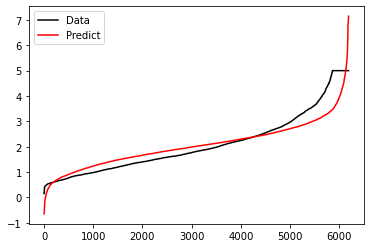

In [42]:
# 结论：模型拟合了比较好的数值，但是丢失了较多信息（没有很好拟合分布）
import matplotlib.pyplot as plt
plt.figure()

plt.plot(range(len(y_test)), sorted(y_test), c='black',label='Data')
plt.plot(range(len(yhat)), sorted(yhat), c='red',label='Predict')

plt.legend()
plt.show()

In [ ]:
# Ridge regreesion

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

In [8]:
# reset index
for i in [X_train, X_test]:
    i.index = range(i.shape[0])
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [10]:
from sklearn.linear_model import Ridge
reg = Ridge().fit(X_train, y_train)
reg.score(X_test, y_test)   #数据集中应该不是共线性问题

0.6043610352312278

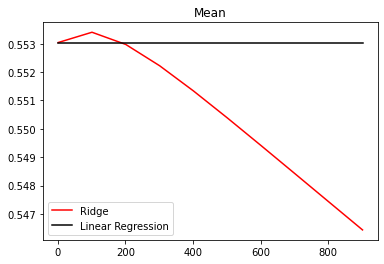

In [12]:
import matplotlib.pyplot as plt

alpharange = np.arange(1, 1001, 100)
ridge, lr = [], []

for a in alpharange:
    reg = Ridge(alpha=a)
    linear = LR()
    
    regs = cross_val_score(reg, X, y, cv=5, scoring="r2").mean()
    linears = cross_val_score(linear, X, y, cv=5, scoring="r2").mean()
    
    ridge.append(regs)
    lr.append(linears)
    
plt.figure()
plt.plot(alpharange, ridge, color='red', label="Ridge")
plt.plot(alpharange, lr, color='black', label="Linear Regression")
plt.title("Mean")
plt.legend()
plt.show()

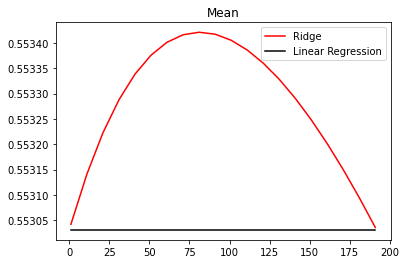

In [14]:
alpharange = np.arange(1, 201, 10)
ridge, lr = [], []

for a in alpharange:
    reg = Ridge(alpha=a)
    linear = LR()
    
    regs = cross_val_score(reg, X, y, cv=5, scoring="r2").mean()
    linears = cross_val_score(linear, X, y, cv=5, scoring="r2").mean()
    
    ridge.append(regs)
    lr.append(linears)
    
plt.figure()
plt.plot(alpharange, ridge, color='red', label="Ridge")
plt.plot(alpharange, lr, color='black', label="Linear Regression")
plt.title("Mean")
plt.legend()
plt.show()

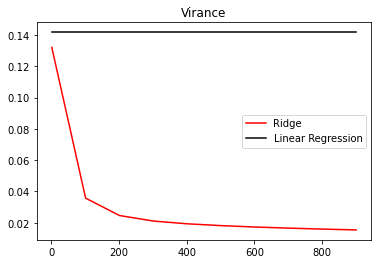

In [20]:
# See variance
alpharange = np.arange(1, 1001, 100)
ridge, lr = [], []

for a in alpharange:
    reg = Ridge(alpha=a)
    linear = LR()
    
    regs = cross_val_score(reg, X, y, cv=5, scoring="r2").var()
    linears = cross_val_score(linear, X, y, cv=5, scoring="r2").var()
    
    ridge.append(regs)
    lr.append(linears)
    
plt.figure()
plt.plot(alpharange, ridge, color='red', label="Ridge")
plt.plot(alpharange, lr, color='black', label="Linear Regression")
plt.title("Virance")
plt.legend()
plt.show()

In [16]:
# Boston Data
from sklearn.datasets import load_boston

X = load_boston().data
y = load_boston().target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

In [18]:
X_train.shape

(354, 13)

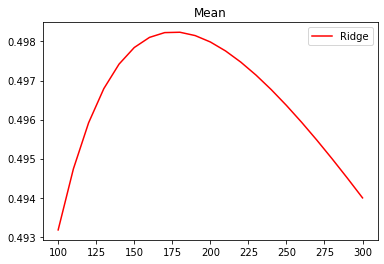

In [24]:
alpharange = np.arange(100, 301, 10)
ridge, lr = [], []

for a in alpharange:
    reg = Ridge(alpha=a)
    #linear = LR()
    
    regs = cross_val_score(reg, X, y, cv=5, scoring="r2").mean()
    #linears = cross_val_score(linear, X, y, cv=5, scoring="r2").mean()
    
    ridge.append(regs)
    #lr.append(linears)
    
plt.figure()
plt.plot(alpharange, ridge, color='red', label="Ridge")
#plt.plot(alpharange, lr, color='black', label="Linear Regression")
plt.title("Mean")
plt.legend()
plt.show()

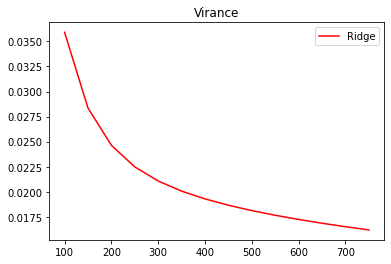

In [25]:
alpharange = np.arange(100, 800, 50)
ridge, lr = [], []

for a in alpharange:
    reg = Ridge(alpha=a)
    #linear = LR()
    
    regs = cross_val_score(reg, X, y, cv=5, scoring="r2").var()
    #linears = cross_val_score(linear, X, y, cv=5, scoring="r2").var()
    
    ridge.append(regs)
    #lr.append(linears)
    
plt.figure()
plt.plot(alpharange, ridge, color='red', label="Ridge")
#plt.plot(alpharange, lr, color='black', label="Linear Regression")
plt.title("Virance")
plt.legend()
plt.show()

In [26]:
reg = Ridge().fit(X_train, y_train)
reg.score(X_test, y_test) 

0.7504796922136654

In [31]:
reg = Ridge(alpha=10).fit(X_train, y_train)
reg.score(X_test, y_test)                      #Ridge模型的score反而降低 - 因为ridge会进行特征选择，导致整体信息量减少

0.7453397158646906

In [32]:
# Alpha and w


# 创建一个10*10的希尔伯特矩阵
x = 1./(np.arange(1,11) + np.arange(0,10)[:,np.newaxis])
y = np.ones(10)

In [33]:
x

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
        0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714,
        0.125     , 0.11111111, 0.1       , 0.09090909, 0.08333333],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ,
        0.11111111, 0.1       , 0.09090909, 0.08333333, 0.07692308],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
        0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857],
       [0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667],
       [0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909,
        0.08333333, 0.07692308, 0.07142857, 0.06666667, 0.0625    ],
       [0.125     , 0.11111111, 0.1      

In [34]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

D:\ISO\Anoconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23725 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ISO\Anoconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 36857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ISO\Anoconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ISO\Anoconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 23725 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\ISO\Anoconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 36857 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\ISO\Anoconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0, flags=flags)


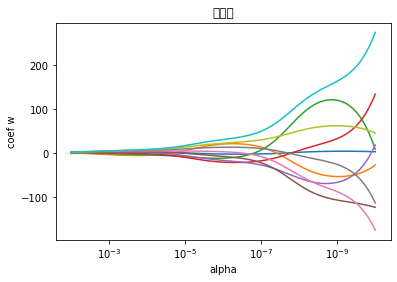

In [38]:

# calculate x asis
n_alphas = 200
alphas = np.logspace(-10,-2,n_alphas)

# gew w
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)
    
# plot
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # inverse xlim
plt.xlabel('alpha')
plt.ylabel('coef w')
plt.title('岭迹图')
plt.axis('tight')
plt.show()

In [39]:
# linear_model.RidgeCV
from sklearn.linear_model import RidgeCV

In [40]:
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = housevalue.feature_names

In [41]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [42]:
Ridge_ = RidgeCV(alphas=np.arange(1,1001,100)
                 ,store_cv_values=True
                ).fit(X,y)

In [43]:
Ridge_.score(X,y)

0.6060251767338437

In [44]:
Ridge_.cv_values_.shape

(20640, 10)

In [46]:
#the mean score for each alpha
Ridge_.cv_values_.mean(axis=0)  # = cross_val_score 得到的十个结果

array([0.52823795, 0.52787439, 0.52807763, 0.52855759, 0.52917958,
       0.52987689, 0.53061486, 0.53137481, 0.53214638, 0.53292369])

In [47]:
# best alpha
Ridge_.alpha_

101

In [48]:
Ridge_ = RidgeCV(alphas=np.arange(1,1001,100)
                 ,scoring="neg_mean_squared_error"
                 ,store_cv_values=True
                ).fit(X,y)

In [49]:
Ridge_.cv_values_.mean(axis=0) 

array([-6.10618033e-05, -9.07302179e-05, -1.11785961e-04, -1.27544011e-04,
       -1.39823410e-04, -1.49699514e-04, -1.57846229e-04, -1.64706208e-04,
       -1.70581703e-04, -1.75685916e-04])

In [50]:
Ridge_.alpha_

101

In [51]:
Ridge_ = RidgeCV(alphas=np.arange(1,1001,100)
                 #,scoring="neg_mean_squared_error"
                 #,store_cv_values=True
                 ,cv=5
                ).fit(X,y)

In [52]:
Ridge_.alpha_

101

In [ ]:
# Lasso
Lasso使用L1范式解决多重共线性
Lasso无法解决特征之间“精确相关”问题 （初灵错误，Lasso不能解决）
Lasso可以解决“高度相关”问题 - 减小w
   Lasso可以限制多重共线性来来的影响
    正则化参数alpha可以取负数
L1正则化可以使某些特征成为0 - 可以用来作 特征选择
Lasso是线性模型的首选特征选择方法

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch

In [3]:
housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = housevalue.feature_names

In [6]:
from sklearn.linear_model import Lasso, Ridge

In [4]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

# 恢复索引
for i in [X_train, X_test]:
    i.index = range(i.shape[0])

In [7]:
reg = LR().fit(X_train, y_train)
(reg.coef_*100).tolist()

[43.73589305968403,
 1.0211268294494025,
 -10.780721617317683,
 62.64338275363768,
 5.216125353123053e-05,
 -0.3348509646333473,
 -41.309593789477155,
 -42.621095362084674]

In [13]:
Ridge_ = Ridge(alpha=10**4).fit(X_train, y_train)
(Ridge_.coef_*100).tolist()

[34.62081517607694,
 1.5196170869238694,
 0.3968610529210159,
 0.9151812510354839,
 0.002173923801224844,
 -0.3476866014810102,
 -14.736963474215257,
 -13.43557610252691]

In [14]:
Lasso_ = Lasso(alpha=10**4).fit(X_train, y_train)
(Lasso_.coef_*100).tolist()
# Lasso在sklearn里面不是用最小二乘法求解，而是用坐标下降法。
# 所以alpha尽量不用0，尽量不要太小
# Lasso对alpha更加敏感

[0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0]

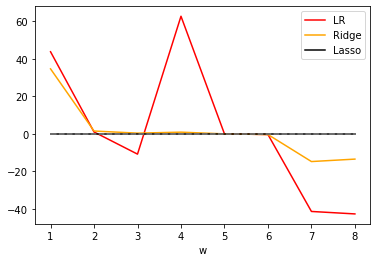

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(1,9), (reg.coef_*100).tolist(), color='red', label='LR')
plt.plot(range(1,9), (Ridge_.coef_*100).tolist(), color='orange', label='Ridge')
plt.plot(range(1,9), (Lasso_.coef_*100).tolist(), color='black', label='Lasso')
plt.plot(range(1,9),[0]*8, color='grey',linestyle='--')
plt.xlabel("w")
plt.legend()
plt.show()

In [ ]:
# LassoCV  选择最佳正则化参数alpha
正则化路径：每个alpha（n个）对应的w（n+1个）形成的向量空间
正则化长度：alpha最小值/alpha最大值
alpha取值非常小，所以规定正则化长度，和alpha的个数，就可以让sklearn自动生成alpha值

In [21]:
from sklearn.linear_model import LassoCV

# Manually set up alpha
alpharange = np.logspace(-10, -2, 200, base=10)  #形成以10为底的指数，之后用logspace取对数

lasso_ = LassoCV(alphas=alpharange
                 , cv=5
                ).fit(X_train, y_train)

In [24]:
lasso_.alpha_

0.0020729217795953697

In [26]:
lasso_.mse_path_.shape  #交叉验证结果

(200, 5)

In [28]:
lasso_.mse_path_.mean(axis=1)
# 每一个alpha下的交叉验证结果

array([0.52816924, 0.52742297, 0.5268146 , 0.52632488, 0.52593241,
       0.52561942, 0.52537133, 0.5251761 , 0.52502385, 0.52490641,
       0.52481712, 0.52475046, 0.52470198, 0.52466795, 0.52464541,
       0.52463188, 0.5246254 , 0.52462436, 0.52462744, 0.52463361,
       0.52464201, 0.52465199, 0.52466301, 0.52467466, 0.5246866 ,
       0.5246986 , 0.52471046, 0.52472203, 0.5247332 , 0.52474392,
       0.52475413, 0.52476379, 0.52477291, 0.52478147, 0.52478949,
       0.52479697, 0.52480393, 0.52481039, 0.52481639, 0.52482193,
       0.52482706, 0.52483179, 0.52483615, 0.52484016, 0.52484385,
       0.52484725, 0.52485036, 0.52485322, 0.52485584, 0.52485824,
       0.52486044, 0.52486246, 0.5248643 , 0.52486599, 0.52486753,
       0.52486895, 0.52487024, 0.52487141, 0.52487249, 0.52487348,
       0.52487437, 0.52487519, 0.52487594, 0.52487663, 0.52487725,
       0.52487782, 0.52487834, 0.52487882, 0.52487925, 0.52487965,
       0.52488001, 0.52488033, 0.52488063, 0.52488091, 0.52488

In [29]:
lasso_.coef_

array([ 4.29867301e-01,  1.03623683e-02, -9.32648616e-02,  5.51755252e-01,
        1.14732262e-06, -3.31941716e-03, -4.10451223e-01, -4.22410330e-01])

In [30]:
lasso_.score(X_test, y_test)

0.6038982670571438

In [32]:
ls_ = LassoCV(eps=0.00001
            ,n_alphas=300
            ,cv=5
            ).fit(X_train, y_train)

In [33]:
ls_.alpha_

0.0020954551690628535

In [35]:
ls_.alphas_.shape

(300,)

In [36]:
ls_.score(X_test, y_test)

0.6038915423819199

In [37]:
ls_.coef_

array([ 4.29785372e-01,  1.03639989e-02, -9.31060823e-02,  5.50940621e-01,
        1.15407943e-06, -3.31909776e-03, -4.10423420e-01, -4.22369926e-01])

In [ ]:
# alpha越大，更多的系数被压缩到0，模型表现持续下降

In [6]:
import numpy as np

a = [[1, 1, 1],
     [3, 2, 1],
     [2, 1, 2]]

print(np.linalg.inv(a))

[[-1.50000000e+00  5.00000000e-01  5.00000000e-01]
 [ 2.00000000e+00  5.55111512e-17 -1.00000000e+00]
 [ 5.00000000e-01 -5.00000000e-01  5.00000000e-01]]


In [2]:
A = np.matrix(a)
print(A.I)

[[-1.50000000e+00  5.00000000e-01  5.00000000e-01]
 [ 2.00000000e+00  5.55111512e-17 -1.00000000e+00]
 [ 5.00000000e-01 -5.00000000e-01  5.00000000e-01]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor

rnd = np.random.RandomState(42)
X = rnd.uniform(-3,3,size=100)  #-3和3之间随机取出100个数

y = np.sin(X) + rnd.normal(size=len(X))/3  #random.normal 取出size个正态分布的随机数

plt.scatter(X, y, marker='o', c='k', s=20)
plt.show()

In [11]:
X.shape

(100, 1)

In [10]:
# sklearn只接受二维以上的数组
X = X.reshape(-1,1)

In [12]:
LinarR = LR().fit(X,y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X,y)

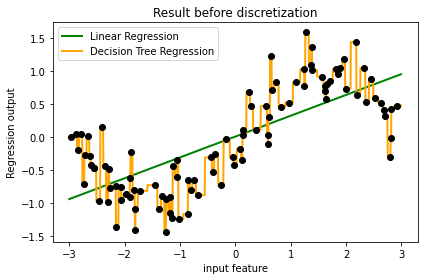

In [18]:
fig, ax1 = plt.subplots(1)

# create tesing data
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

# predict attibute: plot using the result
ax1.plot(line, LinarR.predict(line), linewidth=2, color='green', label="Linear Regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='orange', label="Decision Tree Regression")

ax1.plot(X[:,0], y, 'o', c='k')

ax1.legend(loc='best')
ax1.set_ylabel('Regression output')
ax1.set_xlabel('input feature')
ax1.set_title('Result before discretization')
plt.tight_layout()
plt.show()

In [20]:
# 分箱 KBinsDiscretizer - 线性回归处理非线性问题
from sklearn.preprocessing import KBinsDiscretizer

# 数据分箱
enc = KBinsDiscretizer(n_bins=10
                       , encode='onehot'   
                      )
# onehot：使用哑变量做离散化 
# 返回一个稀疏矩阵（m，n_bins），每一列是一个分号的类别
# 对于每一个样本而言，它包含的分类（箱子）中表示为1，其它分类中表示为0
# ordinal：按数字0-9分类  只返回一列


X_binned = enc.fit_transform(X)

In [22]:
X_binned.shape

(100, 10)

In [23]:
X_binned # sparse matrix 稀疏矩阵

<100x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [24]:
import pandas as pd
pd.DataFrame(X_binned.toarray()).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
LinarR_ = LR().fit(X_binned,y)

In [30]:
# line与X的结构一致，但是和X_binned结构不同
# 训练数据和测试数据必须一致
line_binned = enc.transform(line)
LinarR_.predict(line_binned).shape

(1000,)

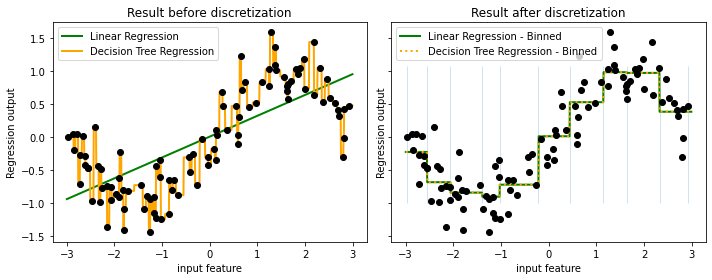

In [36]:
enc = KBinsDiscretizer(n_bins=10
                       , encode='onehot'   
                      )
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)


fig, (ax1,ax2) = plt.subplots(ncols=2
                             ,sharey=True  #两张图共享y轴的刻度
                             ,figsize=(10,4)
                             )

LinarR_ = LR().fit(X_binned,y)
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned,y)

ax2.plot(line, LinarR_.predict(line_binned), linewidth=2, color='green', linestyle='-', label="Linear Regression - Binned")
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='orange', linestyle=':', label="Decision Tree Regression - Binned")


# 绘制和箱宽一样的竖线
ax2.vlines(enc.bin_edges_[0]  #x轴（箱子的上限和下限）
           , *plt.gca().get_ylim() #y轴的上限和下限
           ,linewidth=1
           ,alpha=.2
            )

# 原数据图像
ax2.plot(X[:,0], y, 'o', c='k')

# create tesing data
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)


# predict attibute: plot using the result
ax1.plot(line, LinarR.predict(line), linewidth=2, color='green', label="Linear Regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='orange', label="Decision Tree Regression")

ax1.plot(X[:,0], y, 'o', c='k')

ax1.legend(loc='best')
ax1.set_ylabel('Regression output')
ax1.set_xlabel('input feature')
ax1.set_title('Result before discretization')
ax2.legend(loc='best')
ax2.set_ylabel('Regression output')
ax2.set_xlabel('input feature')
ax2.set_title('Result after discretization')
plt.tight_layout()
plt.show()

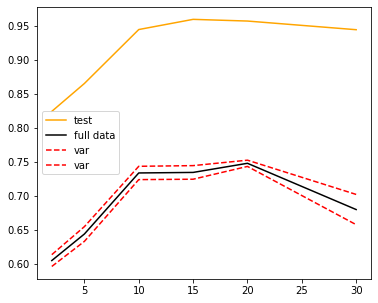

In [42]:
# 选择合适的n_bins
from sklearn.model_selection import cross_val_score as CVS

pred, score, var = [], [], []
binsrange = [2,5,10,15,20,30]
for i in binsrange:
    enc = KBinsDiscretizer(n_bins=i
                       , encode='onehot'   
                      )
    X_binned = enc.fit_transform(X)
    line_binned = enc.transform(line)
    LinarR_ = LR()
    
    cvresult = CVS(LinarR_, X_binned, y, cv=5)
    score.append(cvresult.mean())
    var.append(cvresult.var())
    # 测试集上的预测结果score
    pred.append(LinarR_.fit(X_binned, y).score(line_binned, np.sin(line)))
    
plt.figure(figsize=(6,5))
plt.plot(binsrange, pred, c='orange', label='test')
plt.plot(binsrange, score, c='k', label='full data')
plt.plot(binsrange, score+np.array(var)*0.5, c='red', linestyle='--', label='var')
plt.plot(binsrange, score-np.array(var)*0.5, c='red', linestyle='--')
plt.legend()
plt.show()

In [ ]:
# 多项式变化 - 模拟升维：sklearn.preprocessing.PolynorminalFeatures
# 默认会生成所有degree以下的可能组合。
# 如果interaction_only=True，会避免生成纯次方项。

In [2]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [3]:
X = np.arange(1,4).reshape(-1,1)
X

array([[1],
       [2],
       [3]])

In [5]:
poly = PolynomialFeatures()

In [6]:
X_ = poly.fit_transform(X)

In [7]:
X_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [8]:
xxx = PolynomialFeatures(degree=3).fit_transform(X)
xxx

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [9]:
rnd = np.random.RandomState(42)
y = rnd.randn(3)
y

array([ 0.49671415, -0.1382643 ,  0.64768854])

In [10]:
from sklearn.linear_model import LinearRegression as LR
LR().fit(xxx,y).coef_

array([ 1.36002321e-15, -3.51045297e-01, -6.06987134e-01,  2.19575463e-01])

In [11]:
LR().fit(xxx,y).intercept_
# 截距不是x0的系数 - 算法不知道第一列是截距项

1.2351711202036895

In [ ]:
# 解决方法
1. xxx = PolynomialFeatures(degree=3,include_bias=False).fit_transform(X)
   # 不生成第一列x0。这样计算之后就没有第一个系数了。截距本身就是截距。
2. LR(fit_intercept=False).fit(xxx,y).coef_
   # 要求截距为0。这样第一个系数*1就是截距。

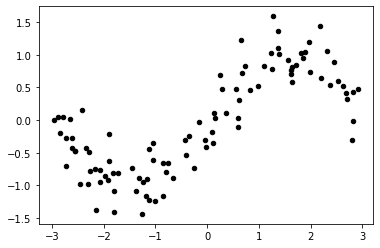

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor

rnd = np.random.RandomState(42)
X = rnd.uniform(-3,3,size=100)  #-3和3之间随机取出100个数

y = np.sin(X) + rnd.normal(size=len(X))/3  #random.normal 取出size个正态分布的随机数

plt.scatter(X, y, marker='o', c='k', s=20)
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures as PF

In [14]:
X = X.reshape(-1,1)

# create tesing data
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

In [15]:
LinearR = LR().fit(X, y)
LinearR.score(X,y)

0.5361526059318595

In [16]:
LinearR.score(line,np.sin(line))

0.6800102369793312

In [17]:
# 多项式拟合
d = 5

poly = PF(degree=d)
X_ = poly.fit_transform(X)
line_ = poly.fit_transform(line)

In [18]:
LinearR_ = LR().fit(X_,y)
LinearR_.score(X_,y)

0.8561679370344799

In [20]:
LinearR_.score(line_, np.sin(line))

0.9868904451787976

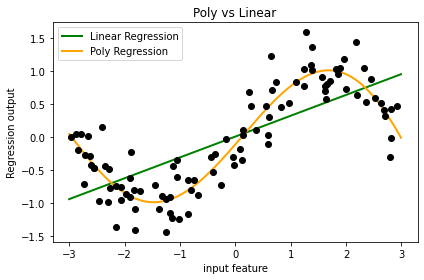

In [22]:
fig, ax1 = plt.subplots(1)

# create tesing data
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

# predict attibute: plot using the result
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green', label="Linear Regression")
ax1.plot(line, LinearR_.predict(line_), linewidth=2, color='orange', label="Poly Regression")

ax1.plot(X[:,0], y, 'o', c='k')

ax1.legend(loc='best')
ax1.set_ylabel('Regression output')
ax1.set_xlabel('input feature')
ax1.set_title('Poly vs Linear')
plt.tight_layout()
plt.show()

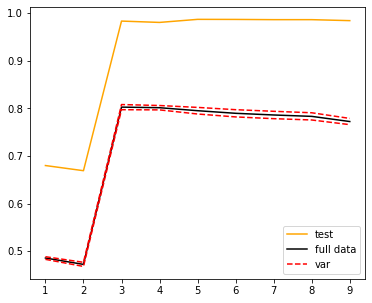

In [24]:
# 最佳degree的选择 (越高越容易过拟合)

from sklearn.model_selection import cross_val_score as CVS

pred, score, var = [], [], []
drange = np.arange(1,10)

for d in drange:
    poly = PF(degree=d)
    X_ = poly.fit_transform(X)
    line_ = poly.fit_transform(line)
    
    LinarR_ = LR()
    
    cvresult = CVS(LinarR_, X_, y, cv=5)
    score.append(cvresult.mean())
    var.append(cvresult.var())
    # 测试集上的预测结果score
    pred.append(LinarR_.fit(X_, y).score(line_, np.sin(line)))
    
plt.figure(figsize=(6,5))
plt.plot(drange, pred, c='orange', label='test')
plt.plot(drange, score, c='k', label='full data')
plt.plot(drange, score+np.array(var)*0.5, c='red', linestyle='--', label='var')
plt.plot(drange, score-np.array(var)*0.5, c='red', linestyle='--')
plt.legend()
plt.show()

In [25]:
d = 3

poly = PF(degree=d)
X_ = poly.fit_transform(X)
line_ = poly.fit_transform(line)

In [26]:
LinearR_ = LR().fit(X_,y)
LinearR_.score(X_,y)

0.8517087521131271

In [27]:
LinearR_.score(line_, np.sin(line))

0.983255068550753

In [28]:
# .get_feature_names() 查看每个特征的名字

from sklearn.datasets import fetch_california_housing as fch
import pandas as pd

In [ ]:
housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target

X.columns = housevalue.feature_names

In [32]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [33]:
poly = PF().fit(X,y)

In [34]:
poly.get_feature_names(X.columns)  #特征组合名字

['1',
 'MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedInc^2',
 'MedInc HouseAge',
 'MedInc AveRooms',
 'MedInc AveBedrms',
 'MedInc Population',
 'MedInc AveOccup',
 'MedInc Latitude',
 'MedInc Longitude',
 'HouseAge^2',
 'HouseAge AveRooms',
 'HouseAge AveBedrms',
 'HouseAge Population',
 'HouseAge AveOccup',
 'HouseAge Latitude',
 'HouseAge Longitude',
 'AveRooms^2',
 'AveRooms AveBedrms',
 'AveRooms Population',
 'AveRooms AveOccup',
 'AveRooms Latitude',
 'AveRooms Longitude',
 'AveBedrms^2',
 'AveBedrms Population',
 'AveBedrms AveOccup',
 'AveBedrms Latitude',
 'AveBedrms Longitude',
 'Population^2',
 'Population AveOccup',
 'Population Latitude',
 'Population Longitude',
 'AveOccup^2',
 'AveOccup Latitude',
 'AveOccup Longitude',
 'Latitude^2',
 'Latitude Longitude',
 'Longitude^2']

In [35]:
X_ = poly.transform(X)

In [37]:
reg = LR().fit(X_,y)
coef = reg.coef_

In [38]:
coef

array([ 5.91954898e-08, -1.12430255e+01, -8.48898551e-01,  6.44105935e+00,
       -3.15913308e+01,  4.06090625e-04,  1.00386233e+00,  8.70568191e+00,
        5.88063274e+00, -3.13081241e-02,  1.85994733e-03,  4.33020448e-02,
       -1.86142297e-01,  5.72831334e-05, -2.59019469e-03, -1.52505720e-01,
       -1.44242944e-01,  2.11725363e-04, -1.26218988e-03,  1.06115040e-02,
        2.81885350e-06, -1.81716946e-03, -1.00690374e-02, -9.99950177e-03,
        7.26947733e-03, -6.89064347e-02, -6.82365631e-05,  2.68878840e-02,
        8.75089947e-02,  8.22890396e-02,  1.60180950e-01,  5.14264038e-04,
       -8.71911385e-02, -4.37043031e-01, -4.04150610e-01,  2.73779463e-09,
        1.91426755e-05,  2.29529811e-05,  1.46567747e-05,  8.71561013e-05,
        2.13344592e-02,  1.62412938e-02,  6.18867358e-02,  1.08107173e-01,
        3.99077351e-02])

In [39]:
[*zip(poly.get_feature_names(X.columns), coef)]

[('1', 5.919548979451466e-08),
 ('MedInc', -11.24302548299935),
 ('HouseAge', -0.8488985511052133),
 ('AveRooms', 6.441059349843383),
 ('AveBedrms', -31.591330763254792),
 ('Population', 0.00040609062532270633),
 ('AveOccup', 1.003862326514533),
 ('Latitude', 8.70568191419001),
 ('Longitude', 5.880632741524842),
 ('MedInc^2', -0.03130812412478552),
 ('MedInc HouseAge', 0.0018599473264526876),
 ('MedInc AveRooms', 0.04330204481030008),
 ('MedInc AveBedrms', -0.1861422968683334),
 ('MedInc Population', 5.7283133376319876e-05),
 ('MedInc AveOccup', -0.0025901946916912564),
 ('MedInc Latitude', -0.1525057196838008),
 ('MedInc Longitude', -0.1442429441109192),
 ('HouseAge^2', 0.00021172536278806547),
 ('HouseAge AveRooms', -0.0012621898754027279),
 ('HouseAge AveBedrms', 0.010611503993005564),
 ('HouseAge Population', 2.8188534961846406e-06),
 ('HouseAge AveOccup', -0.0018171694558569297),
 ('HouseAge Latitude', -0.010069037355560558),
 ('HouseAge Longitude', -0.009999501774406838),
 ('AveR

In [51]:
coeff = pd.DataFrame([poly.get_feature_names(X.columns), coef.tolist()]).T
coeff.head()

,0,1
0,1,0.0
1,MedInc,-11.243025
2,HouseAge,-0.848899
3,AveRooms,6.441059
4,AveBedrms,-31.591331


In [52]:
coeff.columns = ['features','coef']
coeff.sort_values(by='coef') #从小到大

,features,coef
4,AveBedrms,-31.591331
1,MedInc,-11.243025
2,HouseAge,-0.848899
33,AveBedrms Latitude,-0.437043
34,AveBedrms Longitude,-0.404151
12,MedInc AveBedrms,-0.186142
15,MedInc Latitude,-0.152506
16,MedInc Longitude,-0.144243
32,AveBedrms AveOccup,-0.087191
25,AveRooms AveBedrms,-0.068906


In [ ]:
# poly可以用来做特征选择，特征创造

In [58]:
poly = PF(degree=4).fit(X,y)
X_ = poly.transform(X)

reg = LR().fit(X_,y)
print('R2 is {}'.format(reg.score(X_,y)))

R2 is 0.7451090627097201


In [60]:
from sklearn.ensemble import RandomForestRegressor as RFR

print('R2 is {}'.format(RFR(n_estimators=100).fit(X,y).score(X,y)))

R2 is 0.974407449223263
